### 1: 프리미어리그의 승점 예측
- 단순선형회귀

In [1]:
%config InlineBackend.figure_formats = {'png', 'retina'}
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
# 1. 데이터 로드

In [4]:
with open("./data/premierleague.pkl", "rb") as file:
    datas = pickle.load(file)

df = pd.DataFrame(datas, columns=["name", "gf", "ga", "points"])
df.tail(2)

,name,gf,ga,points
18,Stoke City,35,68,33
19,West Bromwich Albion,31,56,31


In [5]:
# 2. 데이터 처리
# feature, target 데이터 분리

In [6]:
feature_gf = df[["gf"]]
feature_ga = df[["ga"]]
target = df["points"]

In [ ]:
# 3. 모델링 : 모델학습해서 만들기

In [7]:
from sklearn.linear_model import LinearRegression

In [20]:
model_gf = LinearRegression()

model_gf.fit(feature_gf, target)

In [15]:
# 4. 모델 성능 평가 : MSE, RMSE, MAE, MAPE
# MAE

In [16]:
from sklearn.metrics import mean_absolute_error

In [17]:
pred = np.round(model_gf.predict(feature_gf))

In [18]:
feature_gf.values[:5, 0], pred[:5], target.values[:5]

(array([106, 68, 74, 84, 62], dtype=object),
 array([99., 67., 72., 80., 62.]),
 array([100, 81, 77, 75, 70], dtype=object))

In [19]:
mean_absolute_error(target, pred)

5.5

In [ ]:
# 5. 모델 사용
# Leicester City	56	60	47
# 득점이 60점이였으면 승점이 몇점이였을까?

In [21]:
np.round(model_gf.predict([[60]]))

/Users/jaewonlee/my-lecture/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([60.])

In [22]:
# 6. 시각화

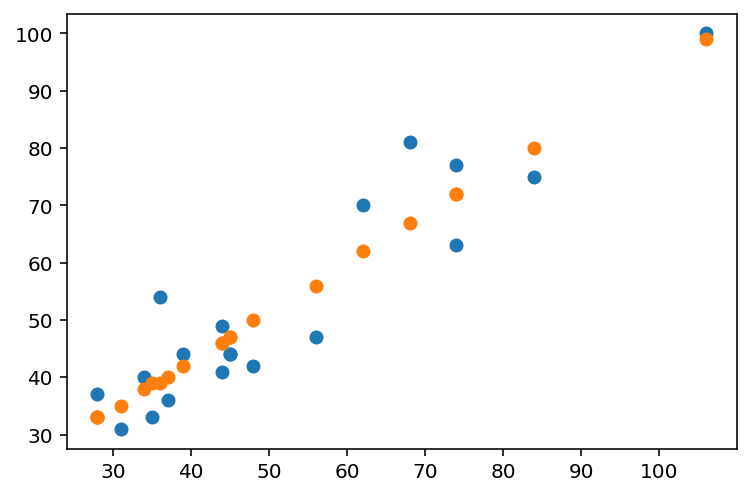

In [23]:
plt.scatter(feature_gf, target)
plt.scatter(feature_gf, pred)
plt.show()

In [ ]:
# 7. 실점으로 모델 만들기
# feature_ga, target

In [ ]:
# 모델 학습

In [25]:
model_ga = LinearRegression()
model_ga.fit(feature_ga, target)

LinearRegression()

In [26]:
# 모델 성능 평가

In [27]:
pred = np.round(model_ga.predict(feature_ga))
mean_absolute_error(target, pred) # 득점 MAE : 5.5

8.05

In [28]:
# 시각화

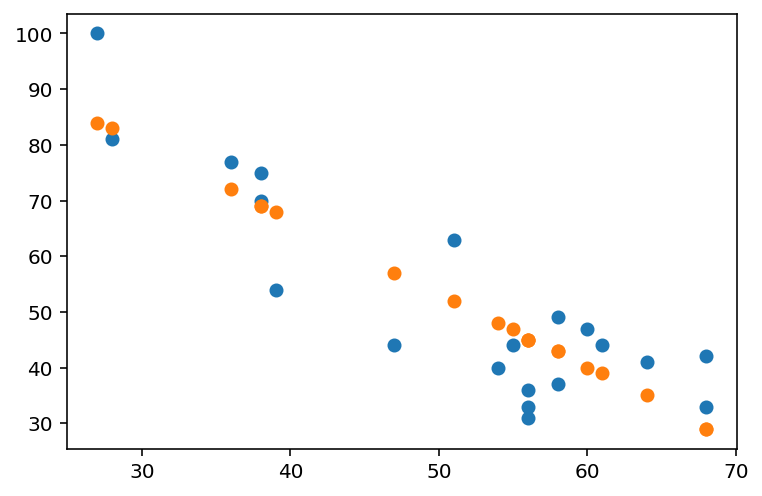

In [29]:
plt.scatter(feature_ga, target)
plt.scatter(feature_ga, pred)
plt.show()

In [30]:
# 회귀계수 확인

In [31]:
model_gf.coef_, model_gf.intercept_

(array([0.85195959]), 8.685257008786401)

In [32]:
model_ga.coef_, model_ga.intercept_

(array([-1.33858081]), 120.18376328796803)

In [ ]:
# 다하신분은 두개의 모델성능이 왜 차이가 날까? 를 고민해보세요.

In [ ]:
# 상관계수출력

In [33]:
for column in ["gf", "ga", "points"]:
    df[column] = df[column].astype("int")

In [34]:
df.dtypes

name      object
gf         int64
ga         int64
points     int64
dtype: object

In [35]:
# 결정계수 : R-squared
np.round(df[["gf", "ga", "points"]].corr() ** 2, 2)

,gf,ga,points
gf,1.00,0.47,0.87
ga,0.47,1.00,0.76
points,0.87,0.76,1.00


In [ ]:
# 광고 매출 데이터
# sales를 예측하기 위해서 tv, radio, newpaper 중에 어떤 feature로 모델링하는게 가장 좋을까?

In [ ]:
with open("datas/advertising.pkl", "rb") as file:
    datas = pickle.load(file)

df = pd.DataFrame(datas, columns=["tv", "radio", "newspaper", "sales"])
df.tail(2)

In [36]:
model_combined = LinearRegression()

In [37]:
# feature_gf = df[["gf"]]
# feature_ga = df[["ga"]]
# target = df["points"]

features = pd.concat([feature_gf, feature_ga], axis=1)
print(features)

     gf  ga
0   106  27
1    68  28
2    74  36
3    84  38
4    62  38
5    74  51
6    36  39
7    44  58
8    56  60
9    39  47
10   45  55
11   45  61
12   48  68
13   44  64
14   34  54
15   28  58
16   37  56
17   28  56
18   35  68
19   31  56


In [38]:
model_combined.fit(features, target)

LinearRegression()

In [39]:
pred_combined = np.round(model_combined.predict(features))
mean_absolute_error(target, pred_combined)

2.9